#### Heart Disease Research Part I
In this project, you’ll investigate some data from a sample patients who were evaluated for heart disease at the Cleveland Clinic Foundation. The data was downloaded from the UCI Machine Learning Repository and then cleaned for analysis. The principal investigators responsible for data collection were:

- Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
- University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
- University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the data 
heart = pd.read_csv('/Users/elorm/Documents/Repos/Datasets/heart_disease.csv')
heart.head()

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
0,63.0,male,145.0,233.0,typical angina,0.0,1.0,150.0,absence
1,67.0,male,160.0,286.0,asymptomatic,1.0,0.0,108.0,presence
2,67.0,male,120.0,229.0,asymptomatic,1.0,0.0,129.0,presence
3,37.0,male,130.0,250.0,non-anginal pain,0.0,0.0,187.0,absence
4,41.0,female,130.0,204.0,atypical angina,0.0,0.0,172.0,absence


In [3]:
#Splitting the dataset into 2 subsets: yes_hd, which contains data for patients with heart disease, no_hd,
#which contains data for patients without heart disease
yes_hd = heart[heart.heart_disease == 'presence']
no_hd = heart[heart.heart_disease == 'absence']

For this project, we’ll investigate the following variables:

chol: serum cholestorol in mg/dl
fbs: An indicator for whether fasting blood sugar is greater than 120 mg/dl (1 = true; 0 = false)
To start, we’ll investigate cholesterol levels for patients with heart disease. We will use the dataset yes_hd to save cholesterol levels for patients with heart disease as a variable named chol_hd.

In [4]:
#Cholesterol levels for patients with heart disease
chol_hd = yes_hd['chol']
print('Average cholesterol level of heart disease patients:', np.mean(chol_hd))

Average cholesterol level of heart disease patients: 251.4748201438849


Do people with heart disease have high cholesterol levels (greater than or equal to 240 mg/dl) on average? Import the function from scipy.stats that you can use to test the following null and alternative hypotheses:

- Null: People with heart disease have an average cholesterol level equal to 240 mg/dl
- Alternative: People with heart disease have an average cholesterol level that is greater than 240 mg/dl

Unfortunately, the scipy.stats function we’ve been using does not (at the time of writing) have an alternative parameter to change the alternative hypothesis for this test. Therefore, you’ll have to run a two-sided test. However, since you calculated earlier that the average cholesterol level for heart disease patients is greater than 240 mg/dl, you can calculate the p-value for the one-sided test indicated above simply by dividing the two-sided p-value in half.

In [5]:
from scipy.stats import ttest_1samp
tstat, pval = ttest_1samp(chol_hd, 240)
print(pval/2)

0.0035411033905155707


ttest_1samp has two inputs: the sample of values (in this case, the cholesterol levels for patients with heart disease) and the null value (in this case, 240). It has two outputs, the t-statstic and a p-value.

When you divide the p-value by two (in order to run the one-sided test), you should get a p-value of 0.0035. This is less than 0.05, suggesting that heart disease patients have an average cholesterol level significantly higher than 240 mg/dl.

In [6]:
#Cholesterol levels for patients without heart disease
chol_no_hd = no_hd['chol']
print('Average cholesterol level of patients without heart disease:', np.mean(chol_no_hd))

Average cholesterol level of patients without heart disease: 242.640243902439


In [7]:
tstat, pval = ttest_1samp(chol_no_hd, 240)
print(pval/2)

0.26397120232220506


In [8]:
#number of patients in the dataset
num_patients = len(heart)
print(num_patients)

303


In [9]:
#Number of patients with fasting blood sugar greater than 120
num_highfbs_patients = np.sum(heart['fbs'] == 1)
num_highfbs_patients

45

Sometimes, part of an analysis will involve comparing a sample to known population values to see if the sample appears to be representative of the general population.

By some estimates, about 8% of the U.S. population had diabetes (diagnosed or undiagnosed) in 1988 when this data was collected. While there are multiple tests that contribute to a diabetes diagnosis, fasting blood sugar levels greater than 120 mg/dl can be indicative of diabetes (or at least, pre-diabetes). If this sample were representative of the population, approximately how many people would you expect to have diabetes? Calculate and print out this number.

Is this value similar to the number of patients with a resting blood sugar above 120 mg/dl — or different?

In [10]:
# calculate 8% of sample size
print(0.08*num_patients)

24.240000000000002


We want to calculate 8% of the sample size (which is 303). Therefore, we should multiply 0.08*303. This comes out to approximately 24 patients, which is almost half the number with fbs > 120 in the sample (45).

Does this sample come from a population in which the rate of fbs > 120 mg/dl is equal to 8%? Import the function from scipy.stats that you can use to test the following null and alternative hypotheses:

- Null: This sample was drawn from a population where 8% of people have fasting blood sugar > 120 mg/dl
- Alternative: This sample was drawn from a population where more than 8% of people have fasting blood sugar > 120 mg/dl

In [11]:
from scipy.stats import binom_test
pval = binom_test(num_highfbs_patients, num_patients, .08, alternative='greater')
print(pval)

4.689471951449078e-05


A p-value of 4.689471951449078e-05 which is equivalent to 0.0000469 (the e-5 at the end indicates scientific notation). This is less than 0.05, indicating that this sample likely comes from a population where more than 8% of people have fbs > 120 mg/dl.

#### Heart Disease Research Part 2

In [12]:
print(heart.head())

    age     sex  trestbps   chol                cp  exang  fbs  thalach  \
0  63.0    male     145.0  233.0    typical angina    0.0  1.0    150.0   
1  67.0    male     160.0  286.0      asymptomatic    1.0  0.0    108.0   
2  67.0    male     120.0  229.0      asymptomatic    1.0  0.0    129.0   
3  37.0    male     130.0  250.0  non-anginal pain    0.0  0.0    187.0   
4  41.0  female     130.0  204.0   atypical angina    0.0  0.0    172.0   

  heart_disease  
0       absence  
1      presence  
2      presence  
3       absence  
4       absence  


Each of the patients in this dataset underwent an exercise test, during which their heart rate was monitored. For each patient, thalach gives us the highest heart rate that the patient achieved during this test.

Is thalach associated with whether or not a patient will ultimately be diagnosed with heart disease? Use sns.boxplot() to plot side by side box plots of thalach for patients who were and were not diagnosed with heart disease (indicated by the heart_disease variable). Do you think there is a relationship between these variables?

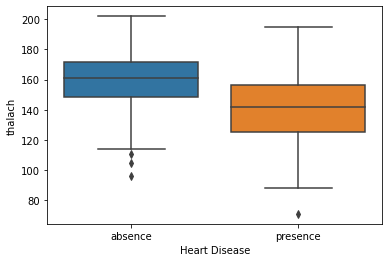

In [13]:
#Box plot to show the association between thalach and whether patients have disease or not
sns.boxplot(data = heart, x = 'heart_disease', y = 'thalach')
plt.xlabel('Heart Disease')
plt.ylabel('thalach')
plt.show()

Based on this plot, patients diagnosed with heart disease generally had a lower maximum heart rate during their exercise test.

In order to investigate this question further, save the values for thalach among patients who were diagnosed with heart disease as a variable named thalach_hd. Then save the values of thalach among patients who were not diagnosed with heart disease as thalach_no_hd.

In [16]:
thalach_hd = heart[heart['heart_disease'] == 'presence']['thalach']
thalach_no_hd = heart[heart['heart_disease'] == 'absence']['thalach']

In [17]:
#Finding the difference of means
mean_thalach_hd = np.mean(thalach_hd)
mean_thalach_no_hd = np.mean(thalach_no_hd)
diff_of_means = abs(mean_thalach_hd - mean_thalach_no_hd)
print(diff_of_means)

19.11905597473242


In [18]:
#Finding the difference of medians
median_thalach_hd = np.median(thalach_hd)
median_thalach_no_hd = np.median(thalach_no_hd)
diff_of_medians = abs(median_thalach_hd - median_thalach_no_hd)
print(diff_of_medians)

19.0


We’d like to find out if the average thalach of a heart disease patient is significantly different from the average thalach for a person without heart disease.

Import the statistical test from scipy.stats that we would use to test the following null and alternative hypotheses:

- Null: The average thalach for a person with heart disease is equal to the average thalach for a person without heart disease.
- Alternative: The average thalach for a person with heart disease is NOT equal to the average thalach for a person without heart disease.


This requires a two-sample t-test, which can be implemented using the ttest_ind() function from scipy.stats. 

In [19]:
from scipy.stats import ttest_ind
tstat, pval = ttest_ind(thalach_hd, thalach_no_hd)
print(pval)

3.456964908430172e-14


A p-value of 3.456964908430172e-14, which is equivalent to 0.00000000000003457. This is less than 0.05, so we “reject the null hypothesis” and conclude that there is a significant difference in thalach for people with heart disease compared to people without heart disease.

Using the same process let's investigate at least one other quantitative variable. Options include age, trestbps (resting blood pressure), and chol (cholesterol). Are any of these variables also significantly associated with heart disease?